In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from random import randint
import numpy as np

In [3]:
# Importing the dataset
dataset = pd.read_csv('forestfires.csv')

In [4]:
data_month = pd.get_dummies(dataset['month'])
dataset = pd.concat([dataset, data_month], axis=1)

data_day = pd.get_dummies(dataset['day'])
dataset = pd.concat([dataset, data_day], axis=1)

dataset = dataset.drop(['month', 'day'], axis = 1)

In [5]:
dataset.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
y = dataset['area']
x = dataset.drop(['area'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.05)

In [16]:
MLP = MLPRegressor(hidden_layer_sizes=(3,4,4,5),
                     max_iter=10000, 
                     activation='identity', 
                     learning_rate='adaptive',
                     learning_rate_init=0.005,
                     batch_size = 16,
                     solver = 'lbfgs')
MLP.fit(X_train, Y_train)

MLPRegressor(activation='identity', alpha=0.0001, batch_size=16, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 4, 4, 5), learning_rate='adaptive',
       learning_rate_init=0.005, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

MSE: 11.56775954053053


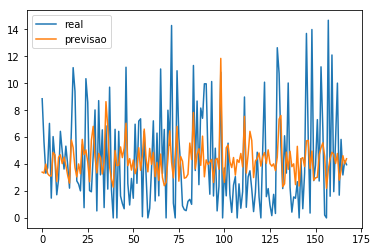

In [17]:
pred = MLP.predict(X_train)

print('MSE:', mean_squared_error(Y_train, pred))

plt.plot(list(Y_train), label='real')
plt.plot(list(pred), label='previsao')
plt.legend()
plt.show()

MSE: 20.361408090832786


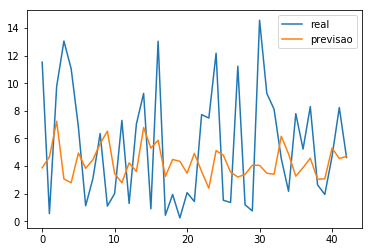

In [18]:
pred = MLP.predict(X_test)

print('MSE:', mean_squared_error(Y_test, pred))

plt.plot(list(Y_test), label='real')
plt.plot(list(pred), label='previsao')
plt.legend()
plt.show()

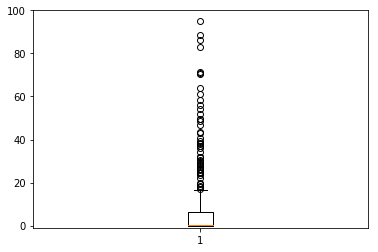

In [19]:
plt.boxplot(list(dataset.area))
plt.axis([0,2,-1, 100])
plt.show()

In [20]:
outliers = dataset[dataset.area >15]
drop_list = []
for i in outliers.index:
    drop_list.append(i)
    
outliers = dataset[dataset.area==0]
random_pos = []
for i in range(int(len(outliers)-10)):
    pos = randint(0, len(outliers)-1)
    while pos in random_pos:
        pos = randint(0, len(outliers)-1)
    random_pos.append(pos)
    drop_list.append(outliers.index[pos])

new_dataset = dataset.drop(drop_list, axis = 0)

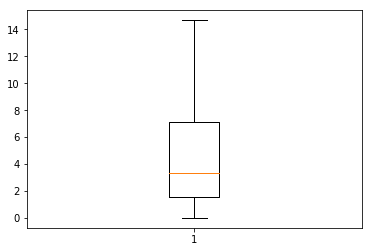

In [21]:
plt.boxplot(list(new_dataset.area))
plt.show()

In [22]:
MLP1 = MLPRegressor(hidden_layer_sizes=(3,4,4,5),
                     max_iter=10000, 
                     activation='identity', 
                     learning_rate='adaptive',
                     learning_rate_init=0.005,
                     batch_size = 16,
                     solver = 'lbfgs')

y = new_dataset['area']
x = new_dataset.drop(['area'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

MLP1.fit(X_train, Y_train)

MLPRegressor(activation='identity', alpha=0.0001, batch_size=16, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 4, 4, 5), learning_rate='adaptive',
       learning_rate_init=0.005, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

MSE: 13.076855432243422


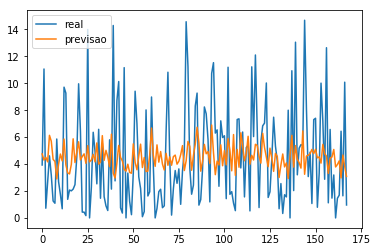

In [23]:
pred = MLP1.predict(X_train)

print('MSE:', mean_squared_error(Y_train, pred))

plt.plot(list(Y_train), label='real')
plt.plot(list(pred), label='previsao')
plt.legend()
plt.show()

MSE: 18.59988278993252


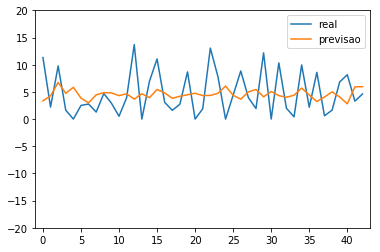

In [24]:
pred = MLP1.predict(X_test)

print('MSE:', mean_squared_error(Y_test, pred))

plt.plot(list(Y_test), label='real')
plt.plot(list(pred), label='previsao')
plt.axis([-1,43,-20, 20])
plt.legend()
plt.show()